# INCOME QUALIFICATION PREDICTION
- Sharvari Avhad

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

In [2]:
train = pd.read_csv(r'C:\Users\SHARVARI AVHAD\Desktop\SEM_4\PR Datasets\train.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


## Identify the output variable: 

- The output variable is the Target column.

## Understand the data:

In [3]:
train.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.2+ MB


## Target Variable 

#### The target variable is an ordinal variable indicating groups of income levels as follows:
- 1 = Extreme Poverty
- 2 = Moderate Poverty
- 3 = Vulnerable households
- 4 = Non-Vulnerable households

C:\Users\SHARVARI AVHAD\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

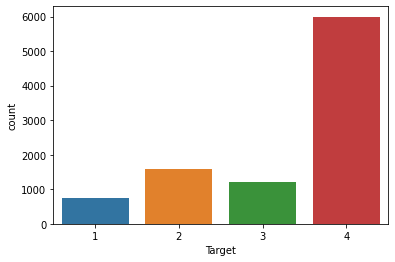

In [5]:
sns.countplot(train['Target'])

- The count of Non-Vulnerable households is the maximum while, Extreme poverty is the least.

In [6]:
train['Target'].isnull().sum()

0

- There are no null values in the target variable.

## Check if there are any biases in your dataset:

- In the target variable, imbalanced classes are present. 

##   Check if there is a house without a family head:

In [7]:
house_head = train.groupby('idhogar')['parentesco1'].sum()
house_head

idhogar
001ff74ca    1
003123ec2    1
006031de3    1
006555fe2    1
00693f597    1
            ..
ff9343a35    1
ff9d5ab17    1
ffae4a097    1
ffe90d46f    1
fff7d6be1    1
Name: parentesco1, Length: 2988, dtype: int64

In [8]:
#ids having no househeads
no_househead = house_head[house_head == 0].index
no_househead

Index(['03c6bdf85', '09b195e7a', '1367ab31d', '1bc617b23', '374ca5a19',
       '61c10e099', '6b1b2405f', '896fe6d3e', 'a0812ef17', 'ad687ad89',
       'b1f4d89d7', 'bfd5067c2', 'c0c8a5013', 'd363d9183', 'f2bfa75c4'],
      dtype='object', name='idhogar')

In [9]:
len(no_househead)

15

- There are 15 families with no head in the house.

## Check whether all members of the house have the same poverty level:

In [10]:
def similarity(lis):
    s = len(set(lis))
    if s == 1:
        return True
    else:
        return False

In [11]:
poverty = train.groupby('idhogar')['Target'].agg(similarity)
poverty

idhogar
001ff74ca    True
003123ec2    True
006031de3    True
006555fe2    True
00693f597    True
             ... 
ff9343a35    True
ff9d5ab17    True
ffae4a097    True
ffe90d46f    True
fff7d6be1    True
Name: Target, Length: 2988, dtype: bool

In [12]:
#ids with same poverty level

similar_poverty = poverty[poverty==True].index
similar_poverty

Index(['001ff74ca', '003123ec2', '006031de3', '006555fe2', '00693f597',
       '006b64543', '00941f1f4', '009ae1cec', '00e3e05c5', '00e443b00',
       ...
       'ff250fd6c', 'ff31b984b', 'ff38ddef1', 'ff6d16fd0', 'ff703eed4',
       'ff9343a35', 'ff9d5ab17', 'ffae4a097', 'ffe90d46f', 'fff7d6be1'],
      dtype='object', name='idhogar', length=2903)

In [13]:
len(similar_poverty)

2903

In [14]:
poverty.index

Index(['001ff74ca', '003123ec2', '006031de3', '006555fe2', '00693f597',
       '006b64543', '00941f1f4', '009ae1cec', '00e3e05c5', '00e443b00',
       ...
       'ff250fd6c', 'ff31b984b', 'ff38ddef1', 'ff6d16fd0', 'ff703eed4',
       'ff9343a35', 'ff9d5ab17', 'ffae4a097', 'ffe90d46f', 'fff7d6be1'],
      dtype='object', name='idhogar', length=2988)

- There are 2903 families with same poverty level.

## Set poverty level of the members and the head of the house within a family: 

In [15]:
for i in poverty[poverty == False].index:
    j = int(train[(train['idhogar'] == i) &  (train['parentesco1'] == 1)]['Target'])
    train.loc[train['idhogar'] == i, 'Target'] = j

In [16]:
poverty = train.groupby('idhogar')['Target'].agg(similarity)
poverty

idhogar
001ff74ca    True
003123ec2    True
006031de3    True
006555fe2    True
00693f597    True
             ... 
ff9343a35    True
ff9d5ab17    True
ffae4a097    True
ffe90d46f    True
fff7d6be1    True
Name: Target, Length: 2988, dtype: bool

In [17]:
poverty.value_counts()

True    2988
Name: Target, dtype: int64

- This shows that, all the 85 families with different poverty levels are now equalised.

##  Count how many null values are existing in columns: 

In [18]:
null_counts = train.isnull().sum()
null_counts[null_counts > 0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

C:\Users\SHARVARI AVHAD\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='v2a1', ylabel='Density'>

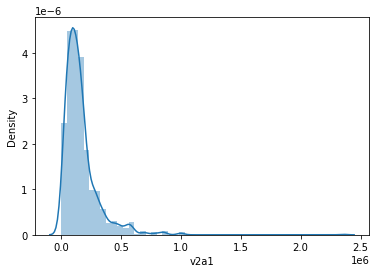

In [19]:
sns.distplot(train['v2a1'])

In [20]:
# REPLACING THE MISSING VALUES IN v2a1 WITH MEDIAN AS IT IS RIGHT SKEWED
train['v2a1'].fillna(train['v2a1'].median(), inplace = True)
train['v2a1']

0       190000.0
1       135000.0
2       130000.0
3       180000.0
4       180000.0
          ...   
9552     80000.0
9553     80000.0
9554     80000.0
9555     80000.0
9556     80000.0
Name: v2a1, Length: 9557, dtype: float64

C:\Users\SHARVARI AVHAD\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='v18q1'>

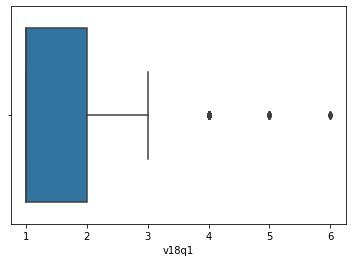

In [21]:
sns.boxplot(train['v18q1'])

C:\Users\SHARVARI AVHAD\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='v18q1', ylabel='Density'>

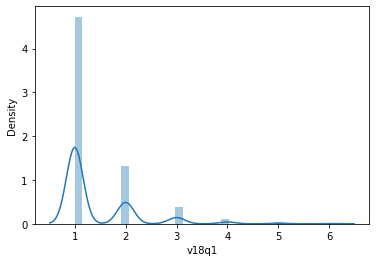

In [22]:
sns.distplot(train['v18q1'])

In [23]:
train['v18q1'] = train['v18q1'].fillna(train['v2a1'].mode()[0])
train['v18q1']

0       130000.0
1            1.0
2       130000.0
3            1.0
4            1.0
          ...   
9552    130000.0
9553    130000.0
9554    130000.0
9555    130000.0
9556    130000.0
Name: v18q1, Length: 9557, dtype: float64

C:\Users\SHARVARI AVHAD\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rez_esc', ylabel='Density'>

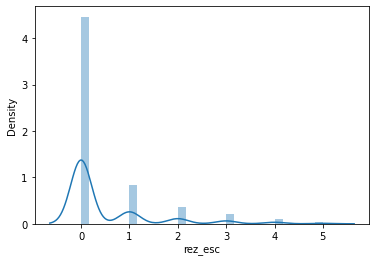

In [24]:
sns.distplot(train['rez_esc'])

In [25]:
# rez_esc IS A DISCRETE VARIABLE AND IS HIGHLY SKEWED, SO REPLACING IT WITH MODE
train['rez_esc'] = train['rez_esc'].fillna(train['rez_esc'].mode()[0])
train['rez_esc']

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
9552    0.0
9553    0.0
9554    0.0
9555    0.0
9556    0.0
Name: rez_esc, Length: 9557, dtype: float64

C:\Users\SHARVARI AVHAD\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='meaneduc', ylabel='Density'>

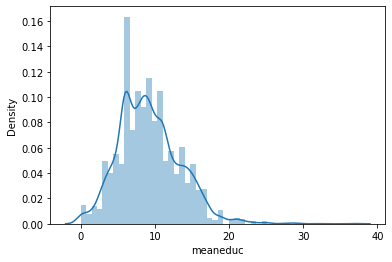

In [26]:
sns.distplot(train['meaneduc'])

In [27]:
# REPLACING THE MISSING VALUES IN meaneduc WITH MEDIAN AS IT IS RIGHT SKEWED
train['meaneduc'].fillna(train['meaneduc'].median(), inplace = True)
train['meaneduc']

0       10.00
1       12.00
2       11.00
3       11.00
4       11.00
        ...  
9552     8.25
9553     8.25
9554     8.25
9555     8.25
9556     8.25
Name: meaneduc, Length: 9557, dtype: float64

C:\Users\SHARVARI AVHAD\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SQBmeaned', ylabel='Density'>

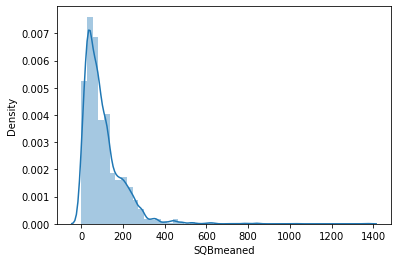

In [28]:
sns.distplot(train['SQBmeaned'])

In [29]:
# REPLACING THE MISSING VALUES IN SQBmeaned WITH MEDIAN AS IT IS RIGHT SKEWED
train['SQBmeaned'].fillna(train['SQBmeaned'].median(), inplace = True)
train['SQBmeaned']

0       100.0000
1       144.0000
2       121.0000
3       121.0000
4       121.0000
          ...   
9552     68.0625
9553     68.0625
9554     68.0625
9555     68.0625
9556     68.0625
Name: SQBmeaned, Length: 9557, dtype: float64

In [30]:
train.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

## Applying multiple models:

In [31]:
# CHECKING THE COLUMNS WITH object DATATYPE
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [32]:
train['dependency'] = train['dependency'].replace({'yes':1, 'no':0})
train['dependency'] = pd.to_numeric(train['dependency'])

In [33]:
# CONVERTING THE DATA-TYPE OF edjefe(years of education of male head) TO NUMERIC VALUES
train['edjefe'] = train['edjefe'].replace({'yes':1, 'no':0})
train['edjefe'] = pd.to_numeric(train['edjefe'])

In [34]:
# CONVERTING THE DATA-TYPE OF edjefa(years of education of female head) TO NUMERIC VALUES
train['edjefa'] = train['edjefa'].replace({'yes':1, 'no':0})
train['edjefa'] = pd.to_numeric(train['edjefa'])

In [35]:
x = train.drop(['Id','idhogar','Target'],axis=1)
y = train['Target']

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

### KNN Model: 

In [37]:
model1 = KNeighborsClassifier()
model1.fit(x_train,y_train)
pred1 = model1.predict(x_test)
pred1

array([4, 4, 4, ..., 2, 3, 4], dtype=int64)

In [38]:
accuracy_score(y_test,pred1)

0.5821129707112971

###  Logistic Regression Model:

In [39]:
model2 = LogisticRegression()
model2.fit(x_train,y_train)
pred2 = model2.predict(x_test)
pred2

C:\Users\SHARVARI AVHAD\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [40]:
accuracy_score(y_test,pred2)

0.6187238493723849

### Decision Tree: 

In [41]:
model3 = tree.DecisionTreeClassifier()
model3.fit(x_train,y_train)
pred3 = model3.predict(x_test)
pred3

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [42]:
accuracy_score(y_test, pred3)

0.9388075313807531

### Guassian Model: 

In [43]:
model4 = GaussianNB()
model4.fit(x_train,y_train)
pred4 = model4.predict(x_test)
pred4

array([4, 3, 4, ..., 1, 4, 4], dtype=int64)

In [44]:
accuracy_score(y_test,pred4)

0.5575313807531381

### Inference:
- Decision tree had the highest accuracy(92.25%) while, GuassianNB Model has the lowest accuracy(54.7%).

## Predict the accuracy using random forest classifier: 

In [45]:
model_ran = RandomForestClassifier(n_estimators=10, random_state=200)
model_ran.fit(x_train,y_train)
pred_ran = model_ran.predict(x_test)
pred_ran

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [46]:
accuracy_score(y_test,pred_ran)

0.9178870292887029

In [47]:
confusion_matrix(y_test, pred_ran)

array([[ 124,    6,    1,   22],
       [   5,  270,    2,   36],
       [   1,   10,  190,   50],
       [   6,    8,   10, 1171]], dtype=int64)

## Check the accuracy using random forest with cross validation: 

In [48]:
rmclassifier = RandomForestClassifier(random_state=100)
cross_val_score(rmclassifier, x_train, y_train, cv=5, scoring='accuracy')

array([0.91497711, 0.9058208 , 0.91890124, 0.91236102, 0.92282538])

## Importing the test data for predicting the output variable(Target): 

In [49]:
test = pd.read_csv(r'C:\Users\SHARVARI AVHAD\Desktop\SEM_4\PR Datasets\test.csv')
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


## Filling the null values: 

In [50]:
test['v2a1'].fillna(test['v2a1'].median(), inplace = True)
test['v18q1'] = test['v18q1'].fillna(train['v2a1'].mode()[0])
test['rez_esc'] = test['v18q1'].fillna(train['v2a1'].mode()[0])
test['meaneduc'].fillna(test['meaneduc'].median(), inplace = True)
test['SQBmeaned'].fillna(test['meaneduc'].median(), inplace = True)

## Modeling the data: 

In [51]:
# CHECKING THE COLUMNS WITH object DATATYPE
test.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_2f6873615,72958b30c,0.5,no,17
1,ID_1c78846d2,72958b30c,0.5,no,17
2,ID_e5442cf6a,72958b30c,0.5,no,17
3,ID_a8db26a79,5b598fbc9,no,16,no
4,ID_a62966799,1e2fc704e,8,no,11


In [52]:
test['dependency'] = test['dependency'].replace({'yes':1, 'no':0})
test['dependency'] = pd.to_numeric(test['dependency'])

In [53]:
# CONVERTING THE DATA-TYPE OF edjefe(years of education of male head) TO NUMERIC VALUES
test['edjefe'] = test['edjefe'].replace({'yes':1, 'no':0})
test['edjefe'] = pd.to_numeric(test['edjefe'])

In [54]:
# CONVERTING THE DATA-TYPE OF edjefa(years of education of female head) TO NUMERIC VALUES
test['edjefa'] = test['edjefa'].replace({'yes':1, 'no':0})
test['edjefa'] = pd.to_numeric(test['edjefa'])

In [55]:
test.drop(['Id','idhogar'],axis=1, inplace=True)

In [56]:
rmclassifier.fit(x_train, y_train)
target_predict_testdata = rmclassifier.predict(test)
target_predict_testdata

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [57]:
list(target_predict_testdata)

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


## Some Visualizations: 

<AxesSubplot:xlabel='qmobilephone', ylabel='Target'>

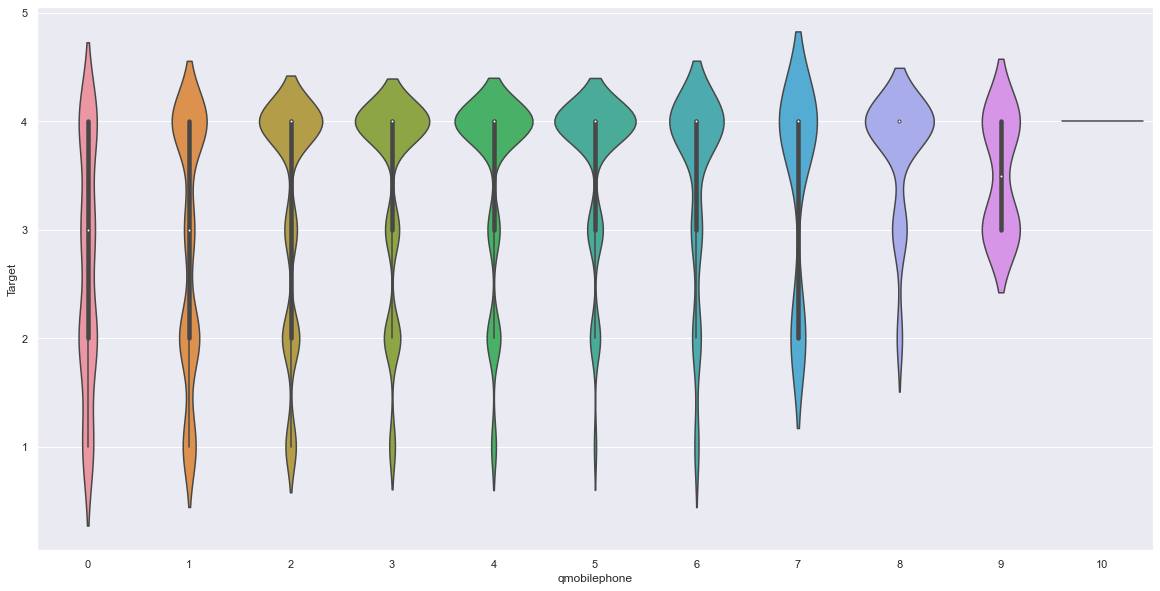

In [58]:
# qmobilephone - no of mobile phones in the house
sns.set(rc={'figure.figsize':(20,10)})
sns.violinplot(x=train['qmobilephone'], y=train['Target'])

- This violin plot shows that, higher the number of phones in a family, lower is the poverty level i.e. families tend to belong to Vulnerable poverty level.

<AxesSubplot:xlabel='r4h2', ylabel='v18q'>

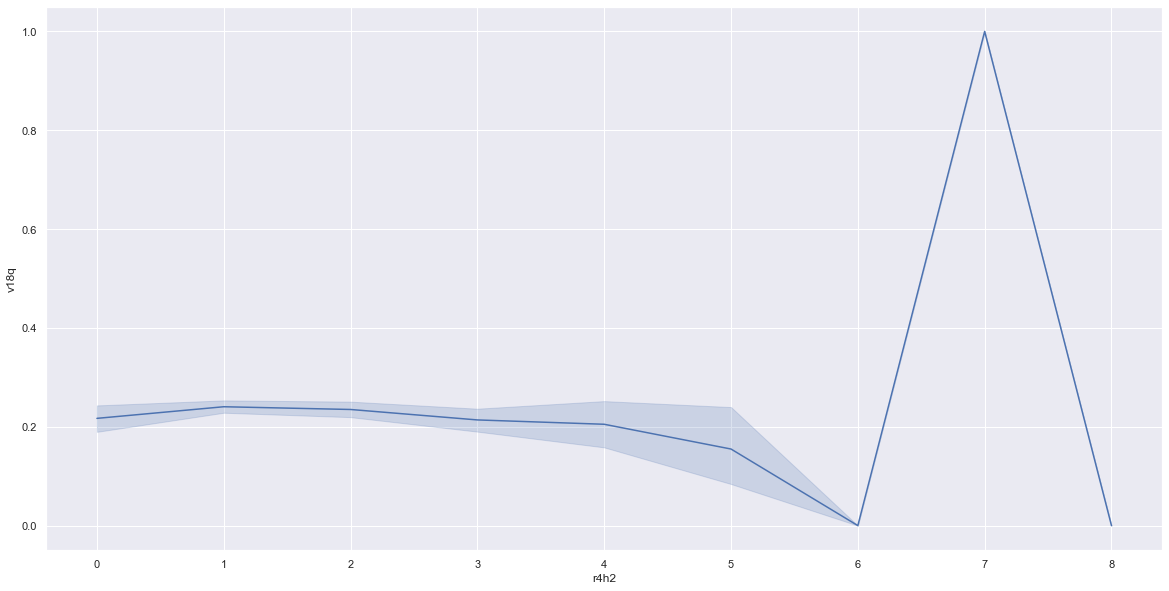

In [59]:
# r4h2 = Males 12 years of age and older, vi8q = does the household own a tablet or not
sns.lineplot(x = train['r4h2'], y = train['v18q'])

- This lineplot shows that, higher the number of males above age 12, higher are the chances of the family of awning a tablet.

<AxesSubplot:xlabel='hogar_total', ylabel='Target'>

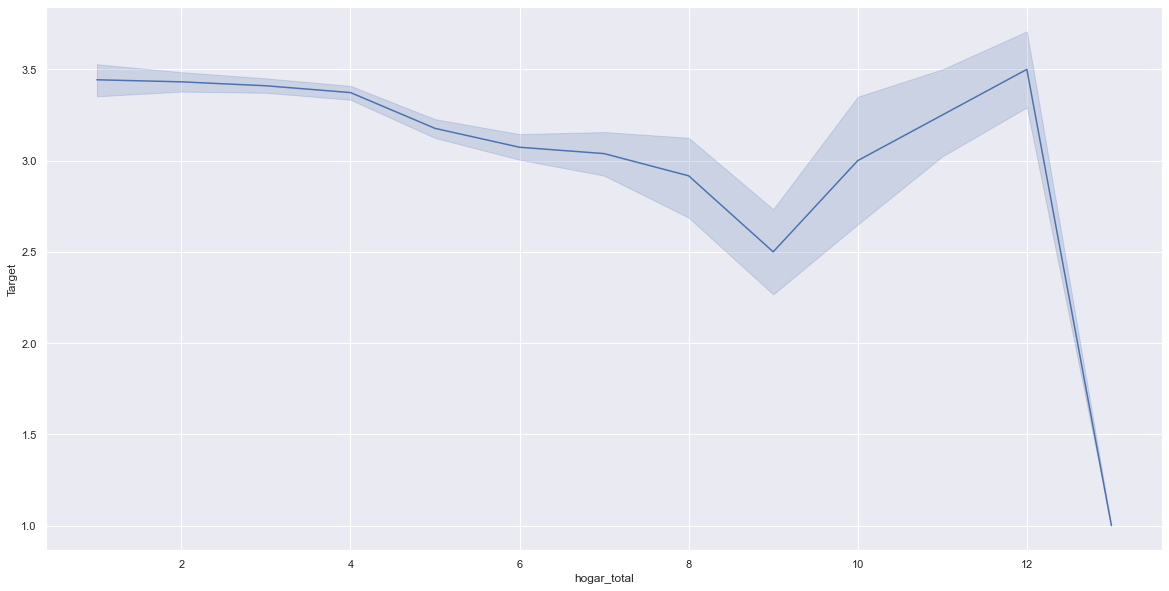

In [60]:
# hogar_total = no of members in the family
sns.lineplot(x = train['hogar_total'], y = train['Target'])

- This lineplot shows that, more the number of members in the family, extreme is the poverty level.

<AxesSubplot:xlabel='sanitario1', ylabel='Target'>

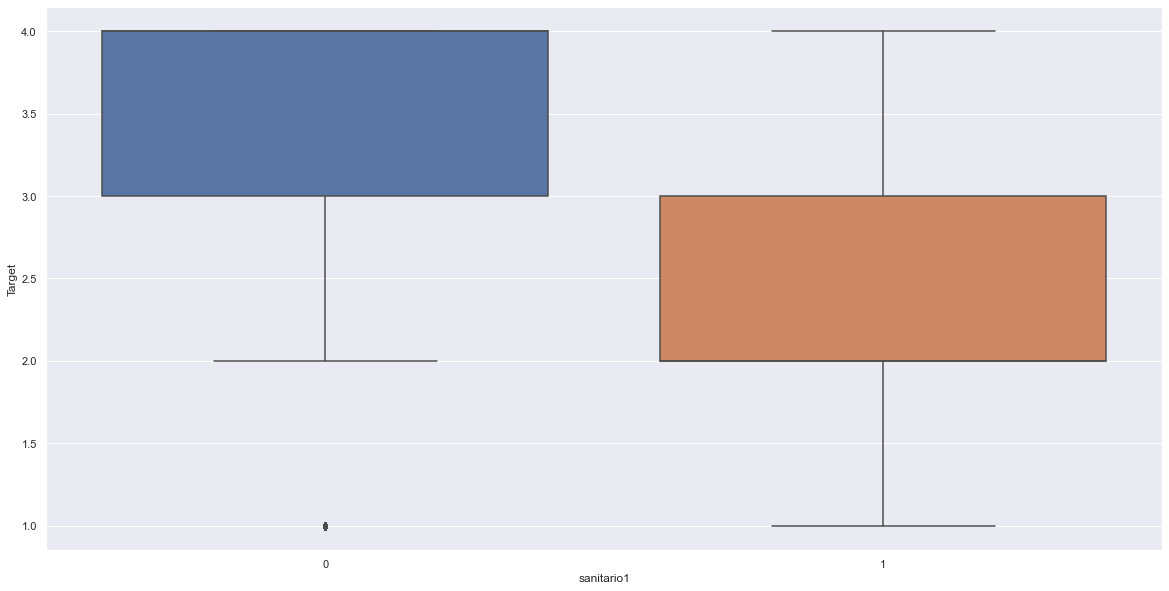

In [61]:
# sanitario1 = 1 means no toilet in the dwelling.
sns.boxplot(x = train['sanitario1'], y = train['Target'])

- This shows that families no toilet in the house lie mostly between 2 to 3 i.e. Extreme poverty and Moderate poverty level. While, families having toilet in their house lie between 3 to 4 indicating Vulnerable and Non-Vulnerable families.